<img src="https://i.imgur.com/YX6UATs.png"  width="160">

# **Projeto Final - Data Science**



---



---



## 01. Exposição do problema

#### **O Projeto:**

O projeto tem como objetivo identificar se características da empresa influênciam no salário ofertado. 

Iremos analisar se o título do cargo, localização da sede, tamanho da empresa ou faturamento influênciam diretamente no salário dos funcionários. 
<br/>

#### **Resumo sobre as seções:**
<br/>

*   **Coleta de dados:** A primeira etapa é carregar ou importar todas as bibliotecas e pacotes necessários para obter os resultados desejados. Uma vez que as bibliotecas são carregadas, precisamos carregar os dados.
<br/>

*   **Preparação dos dados:** Depois de entender os dados, vamos transformá-los para torná-los adequados para que os algoritmos processem e trabalhem com mais eficiência, a fim de fornecer resultados com maior accurácia e precisão. Este é o estágio mais importante e mais demorado de qualquer projeto de ML.
<br/>

*   **Análise exploratória:** Com os dados coletados e preparados para análise. Chegou o momento de explorar os dados de duas formas. A primeira é analisando as estatísticas descritivas, como o nome sugere, descreve os dados em termos de estatísticas - média, desvio padrão, quantis, etc. A segunda é através de visualizações gráficas.
<br/>

*   **Modelagem:** Agora que nossos dados estão prontos, vamos verificar o desempenho em dois algoritmos de regressão. Primeiro, vamos separar em dados de treino e teste. Segundo, criamos o modelo e análisamos e rodamos. Por último, os modelos precisam ser avaliados com base em um determinado conjunto de métricas de avaliação que precisam ser definidas. Para algoritmos de regressão, algumas das métricas comuns são - MSE e R Square.



---



---



## 02. Coleta de dados:

**Coleta de dados:** A primeira etapa é carregar ou importar todas as bibliotecas e pacotes necessários para obter os resultados desejados. Uma vez que as bibliotecas são carregadas, precisamos carregar os dados.
<br/>

Nesse projeto vamos utilizar a coleta de dados secundária que consiste em  coletar os dados de alguma base já criada por outra pessoa, empresa ou organização.
<br/>

**Conjunto de dados:**

O conjunto de dados que iremos utilizar foi coletado da plataforma [Kaggle](https://www.kaggle.com/prithviraj7387/datascientistsalaries). Uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.
<br/>

**Descrição do dados:**

O arquivo que vamos utilizar é o [data_scraped.csv](https://github.com/mharcoshungria/data_scientist_salaries/blob/main/data_scraped.csv), nele encontramos as seguintes informações:

- **Unnamed: 0:** indice segundário;
- **Job Title:** Titulo do cargo;
- **Salary Estimate:** Salário estimado;
- **Job Description:** Descrição do trabalho;
- **Rating:** Ranking;
- **Company Name:** Nome da empresa;
- **Location:** Localização da empresa;
- **Headquarters:** Localização da sede;
- **Size:** Tamanho da empresa;
- **Founded:** Ano que a empresa foi fundada;
- **Type of ownership:** Tipo de sociedade;
- **Industry:** Industria da empresa;
- **Sector:** Setor da empresa;
- **Revenue:** Faturamento;
- **Competitors:** Não identificado.



---



---



## 03. Importando bibliotecas:

In [1]:
# Vamos importar as principais bibliotecas que iremos utilizar no projeto
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

Selecionando os dados que vamos extrair as informações.

In [2]:
# Selecionando a fonte de dados
fonte = "https://raw.githubusercontent.com/mharcoshungria/data_scientist_salaries/main/data_scraped.csv"

Realizando a leitura dos dados.

In [4]:
# leitura de dados
df = pd.read_csv(fonte)

Visualizando o dataset para identificar se as informações de cada coluna conferem com as descrições.

In [5]:
# Visualisando as primeiras 5 linhas do dataset
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Identificando o tamanho do dataset em relação a quantidade de linhas e colunas.

In [6]:
# Visualizando o número de linhas e colunas
nlinhas, nColunas = df.shape
print(f'Este Dataset possui {nlinhas} linhas e {nColunas} colunas')

Este Dataset possui 956 linhas e 15 colunas


Visualizando as colunas e conferindo com a descrição inicial.

In [7]:
# Visualizando nossas colunas
df.columns.values

array(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors'], dtype=object)



---



---



## 04. Preparação dos dados:

**Preparação dos dados:** Depois de entender os dados, vamos transformá-los para torná-los adequados para que os algoritmos processem e trabalhem com mais eficiência, a fim de fornecer resultados com maior accurácia e precisão. Este é o estágio mais importante e mais demorado de qualquer projeto de ML.
<br/>

Os dados da vida real não são organizados e apresentados de maneira adequada e em um dataframe sem anormalidades. Os dados geralmente têm muitas das chamadas anormalidades, como valores ausentes, muitos recursos com formato incorreto, recursos em escalas diferentes, etc. Tudo isso precisa ser tratado manualmente, o que leva muito tempo e requer muito tempo de programação.
<br/>

Durante essa etapa, alguns dos procedimentos que serão realizados:

- Remoção de colunas e dados indesejados;
- Tratamento de dados ausentes;
- Ajustes dos tipos de dados ( datetime, floats, integers, strings , etc...);
- Tratamento de Strings.


Inicialmente, vamos remover as colunas que não influênciam na nossa análise.

In [8]:
# Excluindo as colunas que não iremos utilizar.
df.drop('Unnamed: 0', axis=1, inplace=True) # Coluna idêntica ao índice do próprio pandas. 
df.drop('Job Description', axis=1, inplace=True) # Não existe uma padrão que faça sentido a utilização dos dados.
df.drop('Company Name', axis=1, inplace=True) # Dado não influência as principais variáveis que serão utilizadas.
df.drop('Competitors', axis=1, inplace=True) # Não identificado que tipo de informação essa coluna apresenta.

Foram identificados dados faltantes que foram substituidos por -1.
<br/>

Iremos converter esses dados para o padrão NaN ficando mais amigável e melhor para manejar.

In [9]:
# Convertendo todos os valos "-1" para NaN
df = df[['Job Title', 'Salary Estimate', 'Rating', 'Location',	'Headquarters', 'Size',	'Founded',	'Type of ownership',	'Industry',	'Sector',	'Revenue']].replace('-1', np.NAN)

Agora, vamos identificar quantos valores faltantes existem em cada coluna.

In [10]:
# Analisando a quantidade de vezes o NaN aparece em todo o dataset
df.isnull().sum()

Job Title              0
Salary Estimate      214
Rating                 0
Location               0
Headquarters          11
Size                  11
Founded                0
Type of ownership     11
Industry              39
Sector                39
Revenue               11
dtype: int64

Seguindo a ordem das colunas, foi identificado que não existe valores faltantes na coluna **Job Title** e que o principal problema desta coluna é a não padronização dos cargos.
<br/>

Vamos padronizar essa coluna com os cinco principais cargos identificados, que são:

- **Data Scientist**;
- **Data Engineer**;
- **Data Analyst**;
- **Business Intelligence**;
- **Intern**.

In [11]:
# Padronizando a coluna "Job Title"
df['Job Title'].replace(
    to_replace=['Sr. Enterprise Account Exec- Data Science / ML - NYC','Senior Manager, Epidemiologic Data Scientist','Senior Risk Data Scientist','Senior Data Scientist 4 Artificial Intelligence','Senior Scientist Protein/Oligonucleotides','Senior Insurance Data Scientist','Senior Research Analytical Scientist-Non-Targeted Analysis','Senior Clinical Lab Scientist, Clinical Lab Svcs - FT/Nights (8hr)','Senior Director Biometrics and Clinical Data Management','Sr. Scientist - Digital & Image Analysis/Computational Pathology','Sr Software Engineer (Data Scientist)','Sr. Data Scientist - Analytics, Personalized Healthcare (PHC)','Senior Data Scientist Artificial Intelligence','Senior LiDAR Data Scientist','Senior Data & Machine Learning Scientist','Senior Scientist - Biostatistician','Senior Scientist - Biostatistician ','Senior Data Scientist Oncology','Senior Scientist - Neuroscience','Sr Scientist, Immuno-Oncology - Oncology','Sr Expert Data Science, Advanced Visual Analytics (Associate level)','Senior Scientist - Toxicologist - Product Integrity (Stewardship)','Senior Scientist, Cell Pharmacology/Assay Development','Data Scientist SR','Scientist/Senior Scientist, Autoimmune','Senior Scientist, Logic Gated CAR T Cell Therapy','Senior Data Scientist / Machine Learning','Senior Scientist (Neuroscience)','Sr. Data Scientist II','Senior Scientist - Regulatory Submissions','Sr. Scientist, Quantitative Translational Sciences','Senior Data Scientist - AI Forecasting, Finance team','Senior Data Scientist - Algorithms','Sr. Data Scientist','Sr Data Scientist','Data Scientist, Senior','Senior Data Scientist Statistics','Senior Data Scientist','Data Scientist Manager','Data Science Manager','Senior Formulations Scientist II',
                'Jr. Data Scientist','Staff Data Scientist - Technology','Scientist, Immuno-Oncology','Machine Learning Research Scientist','Pricipal Scientist Molecular and cellular biologist','MED TECH/LAB SCIENTIST - LABORATORY','Associate Principal Scientist, Pharmacogenomics','Medical Lab Scientist - MLT','Quality Control Scientist','PL Actuarial-Lead Data Scientist','Customer Data Scientist','Data Scientist - Health Data Analytics','Scientist Manufacturing Pharma - Kentucky BioProcessing','Principal Scientist - Immunologist','Data Scientist / Machine Learning Expert','Medical Lab Scientist - MLT ','Data Scientist, Office of Data Science','Associate Director/Director, Safety Scientist','Principal Data Scientist with over 10 years experience','Staff Data Scientist','Digital Health Data Scientist','Data Scientist (Actuary, FSA or ASA)','Clinical Laboratory Scientist','Head Data Scientist – Image Analytics lead, Novartis AI Innovation Lab','UX Data Scientist (Python)','Principal Scientist, Hematology','Scientist - Analytical Services','Principal Data Scientist (Computational Chemistry)','Head Data Scientist – NLP lead, Novartis AI Innovation Lab','Data Scientist (Active TS SCI with Polygraph)','Managing Data Scientist/ML Engineer','Scientist, Bacteriology','Staff Scientist- Upstream PD','Scientist - Analytical Development - Pharmaceutics','RESEARCH COMPUTER SCIENTIST - RESEARCH ENGINEER - SR. COMPUTER SCIENTIST - SOFTWARE DEVELOPMENT','Principal Data Scientist (Computational Chemistry','Excel / VBA / SQL Data Analyst','Data Analytics Project Manager','College Hire - Data Scientist - Open to December 2019 Graduates','Scientist','Risk and Analytics IT, Data Scientist','Data Scientist in Artificial Intelligence Early Career','Scientist, Analytical Development','Director Data Science','Scientist, Product Development','Director II, Data Science - GRS Predictive Analytics','Scientist, Pharmacometrics','Data Scientist - Algorithms & Inference','Data Scientist - Systems Engineering','Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence','Product Engineer – Spatial Data Science and Statistical Analysis','Senior Imagery Scientist - SAR TO 11 #78 (TS/SCI)','Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad','Scientist Manufacturing - Kentucky BioProcessing','Machine Learning Engineer - Regulatory','Research Scientist – Security and Privacy','Technology-Minded, Data Professional Opportunities','Associate Environmental Scientist - Wildlife Biologist','Sr. Scientist Method Development','Research Scientist – Security and Privacy ','Computational Chemist/Data Scientist','Scientist, Upstream Process Development (Bioreactors)','Scientist - Biomarker and Flow Cytometry','Medical Lab Scientist','Principal, Data Science - Advanced Analytics','Principal Scientist, Chemistry & Immunology','Associate, Data Science, Internal Audit','Clinical Data Scientist','Scientist – Cancer Drug Discovery','Project Scientist - Auton Lab, Robotics Institute','PV Scientist','Staff Machine Learning Scientist, AI Foundation','Geospatial Software Developer and Data Scientist','Data Scientist - Quantitative','Front-End, Back-End, Fullstack Developers & Data Scientist / Researchers - Cleared OR CLEARABLE (Up to 25% Profit Sharing Benefit!)','VP, Data Science','Deep Learning/Computer Vision Scientist','Product Engineer – Data Science','Data Science Project Manager','Chief Scientist - Emerging Technology Center','Lab Head, Principle Scientist, Dupixent/Type 2 Inflammation & Fibrosis - Cambridge, MA','Data Systems Specialist 2','RESEARCH SCIENTIST - BIOLOGICAL SAFETY','Environmental Scientist','Data Scientist - Research','Clinical Document Review Scientist','R&D Sr Data Scientist','Associate Scientist/Scientist, Process Analytical Technology - Small Molecule Analytical Chemistry','Data Scientist - Alpha Insights','Chief Data Scientist','Scientist - CVRM Metabolism - in vivo pharmacology','Real World Evidence (RWE) Scientist','Data Scientist, Rice University','Clinical Data Manager','Director, Data Science','Sr. Scientist, Toxicology','Scientist 2, QC Viral Vector','Clinical Scientist, Clinical Development','Data Scientist - Consultant - National','Scientist, Molecular/Cellular Biologist','Research Scientist, Machine Learning Department','Healthcare Data Scientist','Research Scientist, Immunology - Cancer Biology','Senior Data Scientist – Visualization, Novartis AI Innovation Lab','Machine Learning Scientist','Senior Research Scientist - Embedded System Development for DevOps','Senior Quantitative Analyst','Process Development Scientist','Project Scientist','Chief Data Officer','Associate Scientist','Data Scientist Analyst','Manager of Data Science','Senior Scientist - Bioanalytical','Director, Precision Medicine Clinical Biomarker Scientist','Senior Data Scientist - R&D Oncology','Associate Scientist ','Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics','Customer Data Scientist/Sales Engineer','Data Scientist/ML Engineer','Associate Scientist, LC/MS Biologics','R&D Data Analysis Scientist','Data Scientist - Sales','Data Management Specialist','Senior Research Statistician- Data Scientist','Senior Spark Engineer (Data Science)','Pharmacovigilance Scientist (Senior Pharmacovigilance)','Data Scientist II','Data Scientist (Warehouse Automation)','Medical Laboratory Scientist','Medical Technologist / Clinical Laboratory Scientist','Food Scientist - Developer','Insurance Data Scientist','Research Scientist','Research Scientist / Principal Research Scientist - Multiphysical Systems','Sr. Data Scientist, Cyber-Security LT Contract','Senior Research Scientist-Machine Learning','Data Scientists','Assistant Director/Director, Office of Data Science','Associate Scientist / Sr. Associate Scientist, Antibody Discovery','Scientist, Stem Cells and Genomics','Sr. Manager, Data Science - Marketing Mix Media','Business Development - Data Supply Partnerships (Veraset)','Data Scientist in Translational Medicine','Customer Data Scientist/Sales Engineer (Bay','Environmental Data Specialist','Head Data Scientist, Predictive Analytics Lead AI Innovation Lab','R&D Specialist/ Food Scientist','MED TECH/LAB SCIENTIST- SOUTH COASTAL LAB','Associate Research Scientist I (Protein Expression and Production)','Product Manager/Data Evangelist','Ag Data Scientist','Staff Scientist-Downstream Process Development','Principal Data Scientist','Lead Data Scientist','Machine Learning Engineer (NLP)','Associate Data Scientist/Computer Scientist','Staff Scientist','Senior Data Scientist: Causal & Predictive analytics AI Innovation Lab','Research Scientist or Senior Research Scientist - Computer Vision','Quality Control Scientist III- Analytical Development','Scientist I/II, Biology ', 'Scientist – Cancer Discovery, Molecular Assay', 'Principal Research Scientist/Team Lead, Medicinal Chemistry - Oncology', 'Principal Machine Learning Scientist', 'Manager, Safety Scientist, Medical Safety & Risk Management', 'Scientist I/II, Biology', 'Data Scientist - Bioinformatics', 'Senior Analytical Scientist', 'Tech Manager, Software Engineering - Data', 'Scientist, Biomarker Science', 'Sr. Scientist II' ],
    value='Data Scientist',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Sr Data Engineer (Sr BI Developer)','Sr. Microsoft Data Engineer','Sr. Data Engineer (ETL Developer)','Senior Data Science Systems Engineer','Sr. BI Data Engineer III','Senior Data Engineer','Sr. Data Engineer','Sr. Data Engineer - Contract-to-Hire (Java)',
                'Data Modeler - Data Solutions Engineer','Enterprise Architect, Data','IT - Data Engineer II','Staff Data Engineer','Director II, Data Science - GRM Actuarial','Data Science Engineer - Mobile','Director - Data, Privacy and AI Governance','Staff Machine Learning Engineer','Associate Data Engineer','Staff BI and Data Engineer','Data Engineer 5 - Contract (Remote)','AWS Data Engineer','Lead Big Data Engineer','Data Engineer - Consultant (Charlotte Based)','Lead Data Engineer (Python)','Data Engineer 4 - Contract (Remote)','Data Engineer, Data Engineering and Artifical Intelligence','Software Data Engineer - College','Data Engineer I','ENVIRONMENTAL ENGINEER/SCIENTIST','Data Modeler','Data Engineering Analyst','Software Engineer (Data Scientist/Software Engineer) - SISW - MG','Data Engineer 4 - Contract','Principal Data Engineer, Data Platform & Insights','Software Engineer - Data Visualization','Data Modeler (Analytical Systems)','Data Platform Engineer','Data Operations Lead','Data Architect / Data Modeler','Data Engineer - ETL','MongoDB Data Engineer II','Big Data Engineer','SQL Data Engineer','Software Engineer Staff Scientist: Human Language Technologies','Data Engineer 5 - Contract','Spectral Scientist/Engineer','Data Engineer with R','Lead Data Engineer','Machine Learning Engineer','Weapons and Sensors Engineer/Scientist – Entry Level','Postdoc Scientist - T cell engineering','Data Engineer I - Azure','Sr. Data Engineer | Big Data SaaS Pipeline','Big Data Engineer - Chicago - Future Opportunity'],
    value='Data Engineer',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Data Analyst Senior','Sr Data Analyst - IT','Sr. Data Analyst','Senior Data Analyst/Scientist','Jr. Business Data Analyst','Junior Data Analyst','Data Analytics Manager','Senior Data Analyst',
                'Marketing Data Analyst, May 2020 Undergrad','Data Science Analyst','Associate Data Analyst','Advanced Analytics Manager','Data Analyst 1, full-time contract worker for up to 12 months','Market Data Analyst','Market Data Analyst ','IT Associate Data Analyst','Corporate Risk Data Analyst (SQL Based) - Milwaukee or','Information Security Data Analyst','Clinical Data Analyst','Products Data Analyst II','Data Analytics Project Manager ','Lead Data Analyst','Digital Marketing & ECommerce Data Analyst','Salesforce Analytics Consultant','Senior Operations Data Analyst, Call Center Operations','Diversity and Inclusion Data Analyst','Systems Engineer II - Data Analyst','Radar Data Analyst','Associate Data Analyst- Graduate Development Program','Analytics - Business Assurance Data Analyst','Business Data Analyst','Data Analyst 2 (Missionary Department)','ATL - Data & Analytics (DA)','Revenue Analytics Manager','Supply Chain Data Analyst','System and Data Analyst','CONSULTANT– DATA ANALYTICS GROUP','Foundational Community Supports Data Analyst','Consultant - Analytics Consulting','Analytics Consultant','Business Data Analyst, SQL','Health Data Analyst/Developer','Financial Data Analyst','Data Analyst II','Web Data Analyst','MSP - Data & Analytics (DA)','Program/Data Analyst','CONSULTANT– DATA ANALYTICS GROUP ','Data Analyst / Scientist','Senior Engineer, Data Management Engineering','Data Analyst 2 (Missionary Department) ','Senior Health Data Analyst, Star Ratings','Data Analyst Level III','Data Analyst Level III ','Data Analyst - Asset Management','Data Analyst, Performance Partnership','Survey Data Analyst','Analytics Manager - Data Mart','Data Analyst Chemist - Quality System Contractor','Analytics Manager','Marketing Data Analyst','Data & Analytics Consultant (NYC)','E-Commerce Data Analyst','Insurance Financial Data Analyst','Lead Health Data Analyst - Front End'],
    value='Data Analyst',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['BI & Platform Analytics Manager','Business Intelligence Analyst / Developer','Business Intelligence Analyst'],
    value='Business Intelligence',
    inplace=True
)

df['Job Title'].replace(
    to_replace=['Data Engineer Intern','Data Science Intern'],
    value='Intern',
    inplace=True
)

df['Job Title'].value_counts()

Data Scientist           612
Data Engineer            193
Data Analyst             133
Business Intelligence     16
Intern                     2
Name: Job Title, dtype: int64

Segunda coluna, está bastante poluída com strings desnecessárias. Está é uma coluna que traz informações númericas e iremos padronizar para esse tipo de análise. 
<br/>

**Passo a passo:**
- Transformar a coluna inicial em duas colunas **Valor Mínimo, Valor Máximo**;
- Excluir a coluna inicial **Salary Estimate**;
- Excluir os salários que não foram divulgados anualmente;
- Limpar as strings;
- Mudar o tipo das novas colunas;
- Converter o valor para milhares;
- Alimentar os valores faltantes com a mediana de cada coluna. 

In [12]:
# Transformando a coluna 'Salary Estimate' em duas colunas 'Valor Mínimo','Valor Máximo'
df[['Valor Mínimo','Valor Máximo']] = df['Salary Estimate'].str.split('-', expand=True)

In [13]:
# Excluindo a coluna 'Salary Estimate'
df.drop('Salary Estimate', axis=1, inplace=True)

In [14]:
# Criando uma lista com o indíce dos salários divulgados por hora.
lista_indice = [197, 209, 240, 247, 257, 307, 337, 427, 437, 456, 464, 522, 523, 632, 652, 682, 694, 786, 787, 823, 854, 875, 919, 936]

# Excluindo esses indices
df = df.drop(lista_indice) 

In [15]:
# Limpando as colunas 'Valor Mínimo','Valor Máximo'
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('K','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('K','')
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('$','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('$','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('Glassdoor est.','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('(','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace(')','')
df['Valor Máximo'] = df['Valor Máximo'].str.replace('Employer est.','')
df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('Employer Provided Salary:','')

C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/2709129999.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valor Mínimo'] = df['Valor Mínimo'].str.replace('$','')
C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/2709129999.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Valor Máximo'] = df['Valor Máximo'].str.replace('$','')
C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/2709129999.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Valor Máximo'] = df['Valor Máximo'].str.replace('Glassdoor est.','')
C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/2709129999.py:7: FutureWarni

In [16]:
# Mudando o type das colunas 'Valor Mínimo','Valor Máximo'
df['Valor Máximo'] = df['Valor Máximo'].astype(float)
df['Valor Mínimo'] = df['Valor Mínimo'].astype(float)

In [17]:
# Convertendo para milhares
df['Valor Máximo'] = df['Valor Máximo'].multiply(1000)
df['Valor Mínimo'] = df['Valor Mínimo'].multiply(1000)

In [18]:
# Preenchendo os valores vazios com a mediana
df['Valor Máximo'] = df['Valor Máximo'].fillna(df['Valor Máximo'].median())
df['Valor Mínimo'] = df['Valor Mínimo'].fillna(df['Valor Mínimo'].median())

A coluna **Revenue** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown / Non-Applicable**. 
<br/>

Para preencher os valores faltantes seguiremos o padrão identificado.

In [19]:
# Substituindo os valores vazios por Unknown / Non-Applicable
df['Revenue'] = df['Revenue'].fillna('Unknown / Non-Applicable')

A coluna **Size** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**.
<br/>

Para preencher os valores faltantes seguiremos o padrão identificado.

In [20]:
# Substituindo os valores vazios por Unknown
df['Size'] = df['Size'].fillna('Unknown')

A coluna **Type of ownership** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**.
<br/>

Para preencher os valores faltantes seguiremos o padrão identificado.

In [21]:
# Substituindo  os valores vazios por Unknown
df['Type of ownership'] = df['Type of ownership'].fillna('Unknown')

A coluna **Sector** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**.
<br/>

Para preencher os valores faltantes segui o padrão identificado.

In [22]:
# Substituindo  os valores vazios por Unknown
df['Sector'] = df['Sector'].fillna('Unknown')

A coluna **Industry** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**.
<br/>

Para preencher os valores faltantes segui o padrão identificado.

In [23]:
# Substituindo  os valores vazios por Unknown
df['Industry'] = df['Industry'].fillna('Unknown')

A coluna **Headquarters** já possuia um padrão para dados não divulgados serem preenchidos como **Unknown**.
<br/>

Para preencher os valores faltantes segui o padrão identificado.

In [24]:
# Substituindo  os valores vazios por Unknown
df['Headquarters'] = df['Headquarters'].fillna('Unknown')

A coluna **Headquarters** traz duas informações como cidade e estado que podemos separar para tratar e criar análises mais significativas.
<br/>

**Passo a passo:**
- Transformar a coluna inicial em duas colunas **Cidade_HQ, Pais_HQ**;
- Excluir a coluna inicial **Headquarters**;
- Substituir os valores faltantes pelo padrão identificado;
- Substituir as siglas dos estados americanos por USA.

In [25]:
# Transformando a coluna 'Headquarters' em duas colunas 'Cidade','Pais'
df[['Cidade_HQ','Pais_HQ']] = df['Headquarters'].str.split(',', expand=True)

# Excluindo a coluna 'Headquarters' porque ela foi dividida em duas colunas
df.drop('Headquarters', axis=1, inplace=True)

# Substituindo  os valores vazios por Unknown
df['Pais_HQ'] = df['Pais_HQ'].fillna('Unknown')

# Transformando em paises
df["Pais_HQ"].replace(
    to_replace=[' CA', ' MD', ' FL', ' WA', ' NY', ' TX', ' VA', ' AR',
       ' NJ', ' MA', ' CO', ' ID', ' GA', ' MI', ' IL', ' CT', ' NE', ' AL', ' MO', ' RI',
       ' OH', ' PA', ' LA', ' DC', ' MN', ' AZ',' IN', ' SC', ' UT', ' TN', ' WI',
       ' AK', ' NV', ' IA', ' NC',' OR', ' PR'],
    value='USA',
    inplace=True
)

Após realizar todas limpezas necessárias, vamos analisar se ainda existem dados faltantes.

In [26]:
# Analisando a quantidade de vezes o NaN aparece em todo o dataset
df.isnull().sum()

Job Title            0
Rating               0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Valor Mínimo         0
Valor Máximo         0
Cidade_HQ            0
Pais_HQ              0
dtype: int64

Visualizando como ficou o nosso dataset após a etapa de Preparação dos dados.

In [27]:
# Visualisando as primeiras 5 linhas do dataset 
df.head()

,Job Title,Rating,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Valor Mínimo,Valor Máximo,Cidade_HQ,Pais_HQ
0,Data Scientist,3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53000.0,91000.0,Goleta,USA
1,Data Scientist,3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),63000.0,112000.0,Baltimore,USA
2,Data Scientist,4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),80000.0,90000.0,Clearwater,USA
3,Data Scientist,3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56000.0,97000.0,Richland,USA
4,Data Scientist,2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,86000.0,143000.0,New York,USA




---



---



## 05. Análise exploratória:

**Análise exploratória:** Com os dados coletados e preparados para análise. Chegou o momento de explorar os dados de duas formas. A primeira é analisando as estatísticas descritivas, como o nome sugere, descreve os dados em termos de estatísticas - média, desvio padrão, quantis, etc. A segunda é através de visualizações gráficas.
<br/>

As visualizações de dados são muito importantes porque são a maneira mais rápida de conhecer os dados e os padrões - se eles existem ou não. As visualizações usando Matplotlib, Seaborn podem ser usadas para verificar as correlações, gráficos de dispersão de dados, histogramas e boxplots para verificar a propagação e assimetrias.


Primeiro, realizaremos uma análise descritiva geral do dataset. 

In [31]:
# Realizando uma análise descritiva dos dados númericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,932.0,3.603004,1.079818,-1.0,3.3,3.8,4.2,5.0
Founded,932.0,1769.543991,605.754504,-1.0,1938.5,1993.0,2008.0,2019.0
Valor Mínimo,932.0,74753.218884,27103.240585,15000.0,60000.0,71000.0,84250.0,202000.0
Valor Máximo,932.0,129417.381974,38747.227314,16000.0,109000.0,126000.0,144000.0,306000.0


Independente de qualquer outra variável, vamos identificar o maior salário e o menor salário do nosso dataset.

In [32]:
# Analisando o maior e menor salário independente da função.
print('O maior salário é $ {}  e o menor salário é $ {}'.format(df['Valor Máximo'].max(), df['Valor Mínimo'].min() ))

O maior salário é $ 306000.0  e o menor salário é $ 15000.0


Como será que o **Valor Máximo** e **Valor Mínimo** se compartam agrupados pelo **Job Title**


In [33]:
# Analisando max e min por Job Title
df.groupby('Job Title')['Valor Mínimo', 'Valor Máximo'].agg(['max', 'min'])


C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/71867527.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Job Title')['Valor Mínimo', 'Valor Máximo'].agg(['max', 'min'])


Valor Mínimo          Valor Máximo          
                               max      min          max       min
Job Title                                                         
Business Intelligence      85000.0  53000.0     134000.0  105000.0
Data Analyst               99000.0  20000.0     178000.0   39000.0
Data Engineer             202000.0  37000.0     306000.0   66000.0
Data Scientist            200000.0  15000.0     289000.0   16000.0
Intern                     71000.0  71000.0     126000.0  126000.0

- No grupo **Business Intelligence** temos uma variação de
aproximadamente **30000.0** em ambas variáveis.

- No grupo **Data Analyst** temos uma variação de
aproximadamente **70000.0** no **Valor Mínimo** e **140000.0**
no **Valor Máximo**. Aprox. o dobro de variação entre as variáveis.

- No grupo **Data Engineer** tem os maiores valores máximos e uma
variação de aproximadamente **160000.0** no **Valor Mínimo** e **140000.0** no **Valor Máximo**.

- No grupo **Data Scientist** temos a maior variação de um grupo. Uma
variação de aproximadamente **185000.0** no **Valor Mínimo** e **270000.0** no **Valor Máximo**.

- Podemos verificar que não existe variação no grupo **Intern**
devido os poucos salários coletados nesse grupo.  


Vamos analisar os valores máximo e mínimo de cada coluna de salário agrupados pelo cargo e tamanho.
<br/>

Objetivo é identificar como os valores se comportam agrupando por duas variáveis.

In [34]:
# Analisando a média por Job Title e Size
df.groupby(['Job Title', 'Size'])['Valor Mínimo', 'Valor Máximo'].mean()

C:\Users\MHARCO~1.HUN\AppData\Local\Temp/ipykernel_2552/321658816.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Job Title', 'Size'])['Valor Mínimo', 'Valor Máximo'].mean()


Valor Mínimo   Valor Máximo
Job Title             Size                                                
Business Intelligence 1001 to 5000 employees   72666.666667  125166.666667
                      201 to 500 employees     71000.000000  126000.000000
                      501 to 1000 employees    71000.000000  126000.000000
Data Analyst          1 to 50 employees        59833.333333  104833.333333
                      10000+ employees         49538.461538   82000.000000
                      1001 to 5000 employees   48538.461538   88653.846154
                      201 to 500 employees     53185.185185   95481.481481
                      5001 to 10000 employees  45666.666667   80555.555556
                      501 to 1000 employees    42535.714286   76928.571429
                      51 to 200 employees      58727.272727  106818.181818
Data Engineer         1 to 50 employees        70312.500000  128250.000000
                      10000+ employees         84769.230769  147076.923077
                      1001 to 5000 employees   76322.580645  137774.193548
                      201 to 500 employees     80222.222222  140481.481481
                      5001 to 10000 employees  74333.333333  134055.555556
                      501 to 1000 employees    63925.925926  112962.962963
                      51 to 200 employees      81883.720930  139069.767442
                      Unknown                  71000.000000  126000.000000
Data Scientist        1 to 50 employees        81277.777778  138972.222222
                      10000+ employees         85848.214286  146562.500000
                      1001 to 5000 employees   74903.846154  129913.461538
                      201 to 500 employees     74650.000000  133090.000000
                      5001 to 10000 employees  77208.333333  136208.333333
                      501 to 1000 employees    77172.839506  132666.666667
                      51 to 200 employees      83306.818182  138704.545455
                      Unknown                  88125.000000  132666.666667
Intern                201 to 500 employees     71000.000000  126000.000000
                      51 to 200 employees      71000.000000  126000.000000

**Observações:**

- Os menores valores no grupo **Data Engineer** não foram informado o tamanho da empresa e os valores coincidem com os valores do grupo **Intern**.

- O tamanho da empresa em relação a número de funcionários em alguns casos não tem muita relação com o salário ofertado. Por exemplo, o grupo **DataEngineer** com **1 to 50 employees** tem média salárial maior do que com **501 to 1000 employees**. Essa não padronização se 
repete  no grupo **Data Scientist** com **1 to 50 employees** e **1001 to 5000 employees** em que a empresa com menos funcionários oferta um salário maior.

Analisando as principais medidas das colunas de salário.

In [35]:
# Analisando as principais medidas das colunas
df[['Valor Mínimo','Valor Máximo']].describe().T

,count,mean,std,min,25%,50%,75%,max
Valor Mínimo,932.0,74753.218884,27103.240585,15000.0,60000.0,71000.0,84250.0,202000.0
Valor Máximo,932.0,129417.381974,38747.227314,16000.0,109000.0,126000.0,144000.0,306000.0


Conseguimos identificar que nos 25% maiores valores que existe uma crescente dos salários.

Vamos iniciar as análises gráficas.
<br/>

Primeiro padronizando as cores de cada coluna. 

In [36]:
# Padronizando as cores 
cor_valor_maximo =  "r"
cor_valor_minimo =  "b"

No primeiro gráfico de histograma o objetivo é identificar onde concentra a maior quantidade de salários.

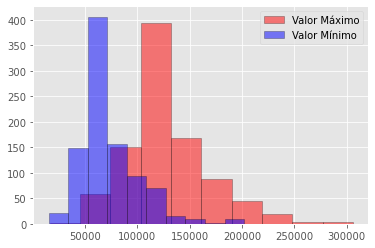

In [37]:
# Aplicando um estilo aos plots
plt.style.use("ggplot")

# Criando gráfico
plt.hist(df['Valor Máximo'],ec = "k", label= 'Valor Máximo', alpha= 0.5, color = cor_valor_maximo)
plt.hist(df['Valor Mínimo'],ec = "k", label= 'Valor Mínimo', alpha= 0.5, color = cor_valor_minimo)

# Colocando a legenda no melhor lugar
plt.legend(loc='best')

# Mostrando gráfico
plt.show()

**Observações:**

Conseguimos identificar que a maior concentração de **Valor Máximo** está entre **100000** e **150000**. Quando analisamos a concentração de **Valor Mínimo** observamos que fica entre **50000** e **90000**.

No próximo gráficos o objetivo é visualizar como os valores estão distribuidos mais claramente.

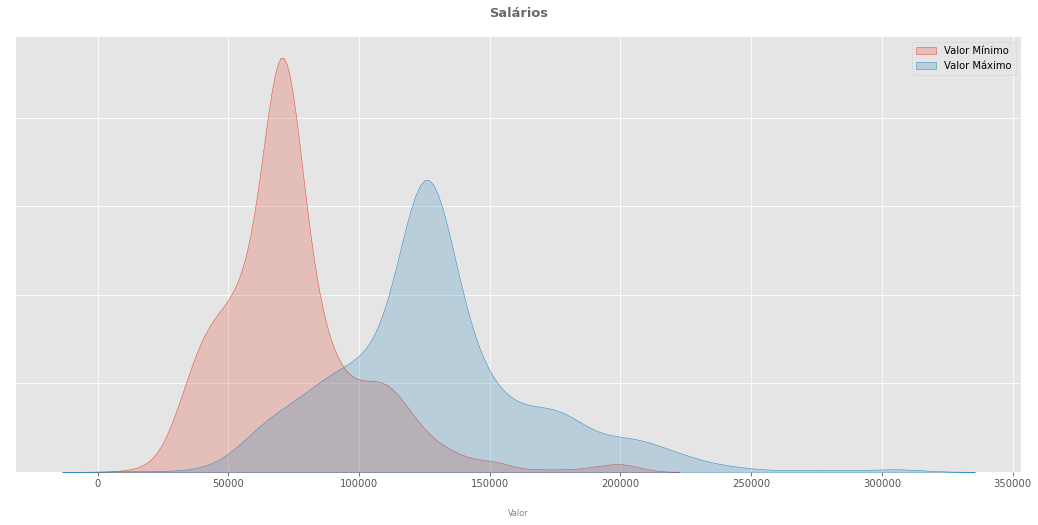

In [38]:
# Configurando tamanho da figura
plt.figure(figsize=(18,8))

# Criando gráfico
g3 = sns.kdeplot(df['Valor Mínimo'], label = 'Valor Mínimo', shade = True)
g3 = sns.kdeplot(df['Valor Máximo'], label = 'Valor Máximo', shade = True)

# Criando titulo
plt.title('Salários',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

sns.despine(bottom = True, left=True)

# Padronizando as legendas
plt.xlabel('Valor', color = 'grey', labelpad = 20, fontsize = 8)


g3.tick_params(axis ='y', labelsize=0, length = 0)
g3.set_yticklabels([])
plt.ylabel([], fontsize =0)

g3 = plt.legend()

**Observações:**

Seguindo nosso objetivo com o gráfico, identificamos que a coluna de **Valores Máximo** são mais **"distribuídos"** do que os **Valores Mínimos** e que a concentração de valores em vermelho tem uma concentração significativa nos valores entre **5000.0** e **10000.0**.

Vamos visualizar graficamente qual cargo tem o maior salário e qual tem o menor. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Data Engineer'),
  Text(2, 0, 'Business Intelligence'),
  Text(3, 0, 'Intern'),
  Text(4, 0, 'Data Analyst')])

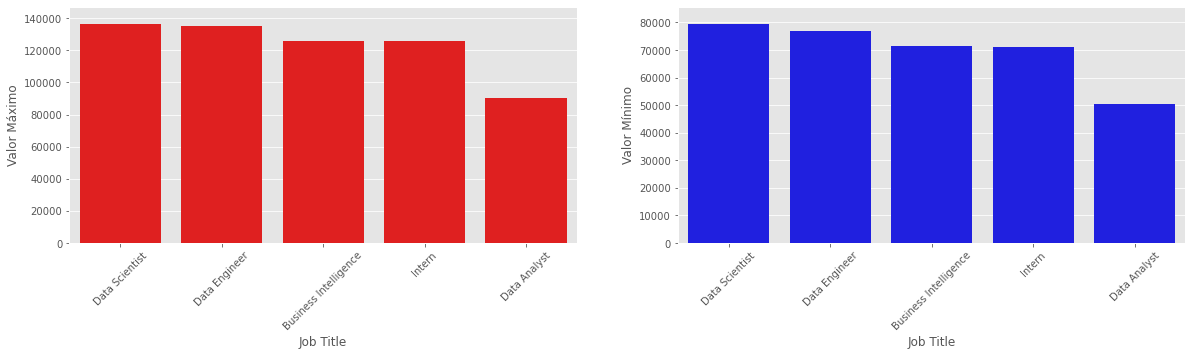

In [39]:
funcoes_order = ['Data Scientist',
    'Data Engineer',
    'Business Intelligence',
    'Intern',
    'Data Analyst'
]

# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Job Title", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= funcoes_order)
plt.xticks(rotation=45)

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Job Title", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= funcoes_order)
plt.xticks(rotation=45)

**Observações:**

Como podemos perceber no gráfico acima, os cargos de **Data Scientist** e **Data Engineer** são os com maiores salários. Curiosamente os cargos de **Business Intelligence** e **Intern** são oferecidos a mesma margem salárial sendo o **Data Analyst** o cargo que, segundo os dados, tem o menor salário.

O gráfico de boxplot nos ajuda a identificar a variação entre os valores do mesmo cargo e comparar com os demais cargos. 

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Data Analyst'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Business Intelligence'),
  Text(4, 0, 'Intern')])

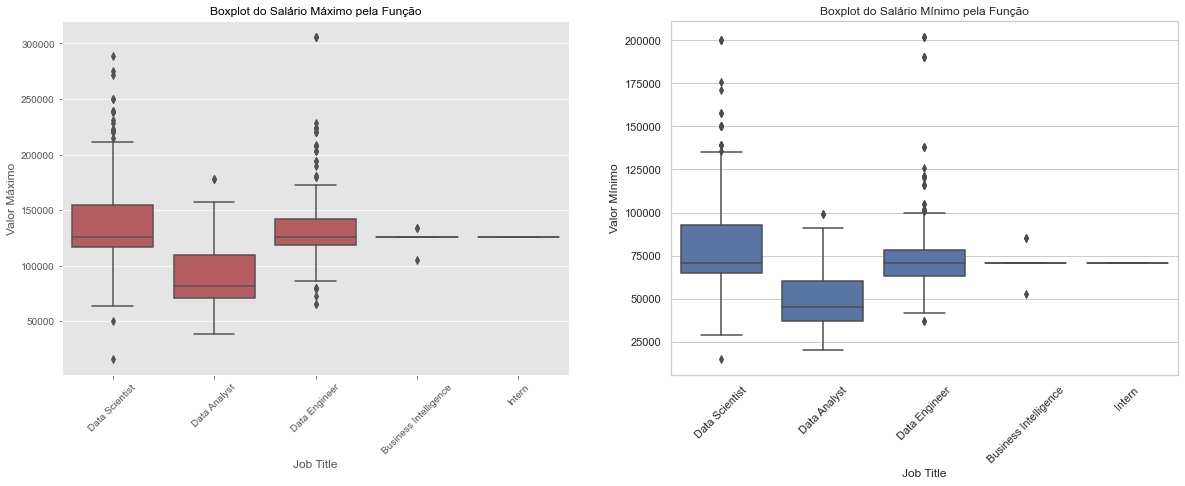

In [40]:
# Criando gráfico
plt.figure(figsize=(20, 30))
plt.subplot(4, 2, 1)
sns.set_theme(style="whitegrid")
sns.boxplot(x="Job Title", y = "Valor Máximo", data = df, color= cor_valor_maximo)
plt.title("Boxplot do Salário Máximo pela Função")
plt.xticks(rotation=45)

# Criando gráfico
plt.subplot(4, 2, 2)
sns.set_theme(style="whitegrid")
sns.boxplot(x="Job Title", y = "Valor Mínimo", data = df, color= cor_valor_minimo)
plt.title("Boxplot do Salário Mínimo pela Função")
plt.xticks(rotation=45)

**Observações:**

Observamos no gráfico anterior que os salários de **Data Scientist** e **Data Engineer** são bem próximos mas, nessa visualização podemos verificar outras métricas que conseguimos diferencia-lós. Como por exemplo, o tamanho da caixa de distribuição dos salários e bem maior no **Data Scientist** do que **Data Engineer**. Isso pode ser devido a maior quantidade de vagas para esse cargo ou que outras variáveis podem influenciar mais os salários de **Data Scientist** do que os de **Data Engineer**.

Vamos vizualizar os salários por outra variável.
<br/>

Nesse momento quero identificar os valores salariais pela localidade.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'USA'),
  Text(1, 0, ' Japan'),
  Text(2, 0, ' Switzerland'),
  Text(3, 0, ' Germany'),
  Text(4, 0, ' United Kingdom'),
  Text(5, 0, ' Belgium'),
  Text(6, 0, ' China'),
  Text(7, 0, ' Bermuda'),
  Text(8, 0, ' South Korea'),
  Text(9, 0, ' India'),
  Text(10, 0, ' Singapore'),
  Text(11, 0, 'Unknown'),
  Text(12, 0, ' Spain'),
  Text(13, 0, ' France')])

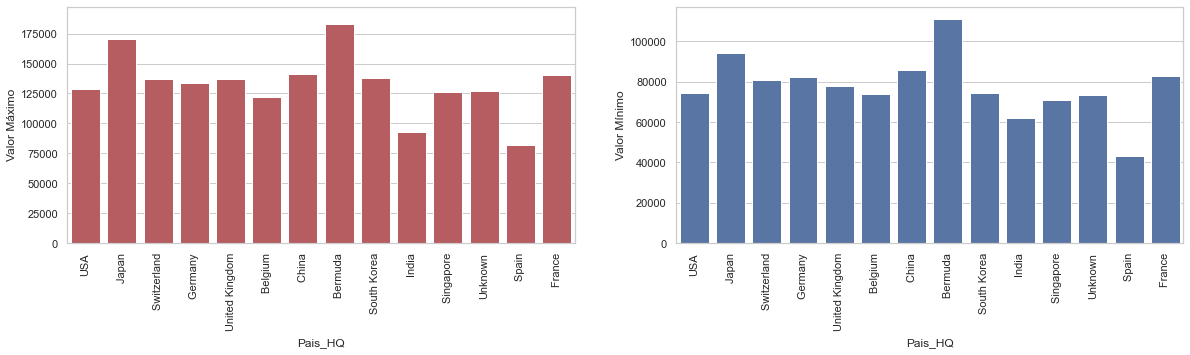

In [41]:
# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
ax = sns.barplot(x="Pais_HQ",
            y="Valor Máximo", 
            data=df, 
            color= cor_valor_maximo,
            errwidth=False)
plt.xticks(rotation=90)

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Pais_HQ", 
            y="Valor Mínimo", 
            data=df,
            color= cor_valor_minimo,
            errwidth=False)
plt.xticks(rotation=90)

**Observações:**

Podemos perceber no gráfico de barras acima que os salários de Bermuda é o que tem a faixa mais alta entre os países, em segundo lugar o Japão. Já a India e a Espanha oferecem os menores salários.


Nesse momento quero identificar os valores salariais pelo tamanho da empresa levando em consideração a quantidade de employees. Se realmente quanto mais funcionários a empresa tem, maior é o salário dos colaboradores. 

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1 to 50 employees'),
  Text(1, 0, '51 to 200 employees'),
  Text(2, 0, '201 to 500 employees'),
  Text(3, 0, '501 to 1000 employees'),
  Text(4, 0, '1001 to 5000 employees'),
  Text(5, 0, '5001 to 10000 employees'),
  Text(6, 0, '10000+ employees'),
  Text(7, 0, 'Unknown')])

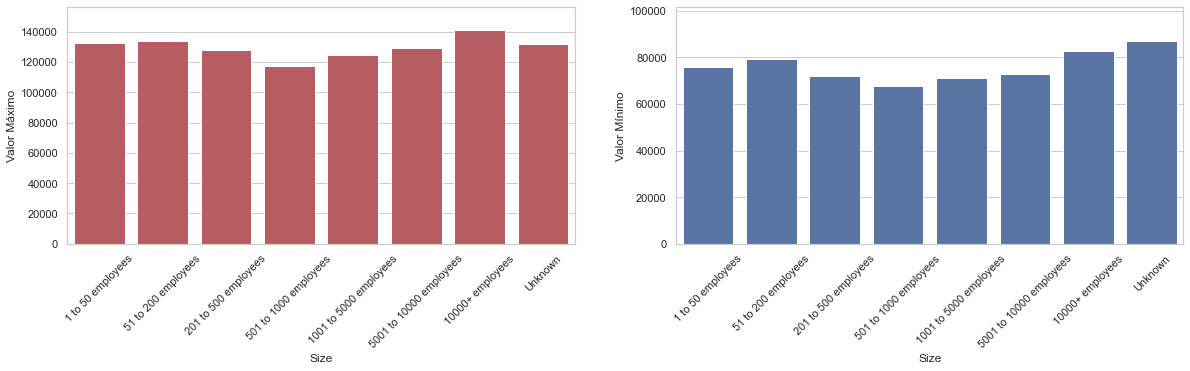

In [42]:
tamanho_order = ['1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees',
    'Unknown'
]
# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Size", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= tamanho_order)
plt.xticks(rotation=45)

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Size", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= tamanho_order)
plt.xticks(rotation=45)

**Observações:**

Realmente as empresas com **10000 + employees** pagam os maiores salários mas, não existe uma diferença significativa que nos leva a afirmar que o número de funcionários influência o salário recebido. 

Verificando pela ótica do faturamento, será que quanto maior o faturamento da empresa maior os salários ofertados.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Less than $1 million (USD)'),
  Text(1, 0, '$1 to $5 million (USD)'),
  Text(2, 0, '$5 to $10 million (USD)'),
  Text(3, 0, '$10 to $25 million (USD)'),
  Text(4, 0, '$25 to $50 million (USD)'),
  Text(5, 0, '$50 to $100 million (USD)'),
  Text(6, 0, '$100 to $500 million (USD)'),
  Text(7, 0, '$500 million to $1 billion (USD)'),
  Text(8, 0, '$1 to $2 billion (USD)'),
  Text(9, 0, '$2 to $5 billion (USD)'),
  Text(10, 0, '$5 to $10 billion (USD)'),
  Text(11, 0, '$10+ billion (USD)'),
  Text(12, 0, 'Unknown / Non-Applicable')])

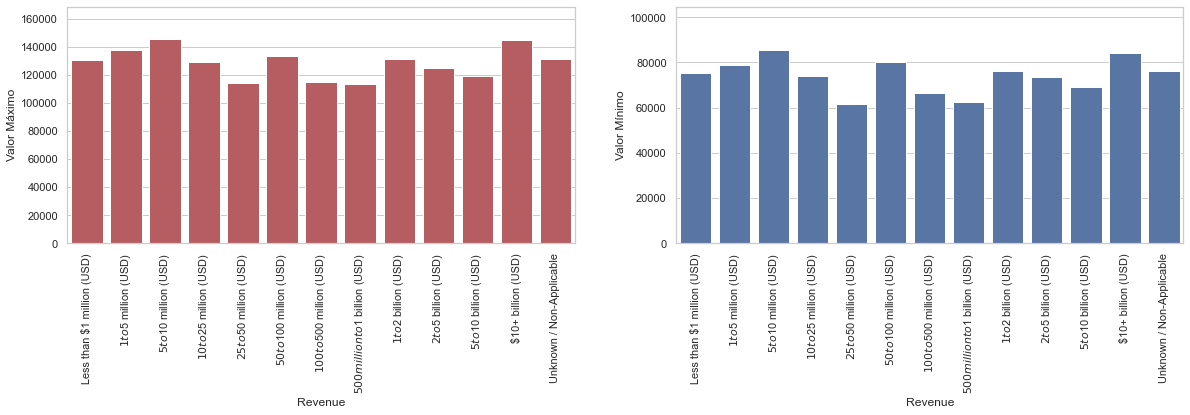

In [43]:
faturamento_order = ['Less than $1 million (USD)',
    '$1 to $5 million (USD)',
    '$5 to $10 million (USD)',
    '$10 to $25 million (USD)',
    '$25 to $50 million (USD)',
    '$50 to $100 million (USD)',
    '$100 to $500 million (USD)',
    '$500 million to $1 billion (USD)',
    '$1 to $2 billion (USD)',
    '$2 to $5 billion (USD)',
    '$5 to $10 billion (USD)',
    '$10+ billion (USD)',
    'Unknown / Non-Applicable'
]

# Criando gráfico
plt.figure(figsize=(20, 20))
plt.subplot(4, 2, 1)
sns.barplot(x="Revenue", y="Valor Máximo", data=df, color= cor_valor_maximo, errwidth=False, order= faturamento_order)
plt.xticks(rotation=90)

# Criando gráfico
plt.subplot(4, 2, 2)
sns.barplot(x="Revenue", y="Valor Mínimo", data=df, color= cor_valor_minimo, errwidth=False, order= faturamento_order)
plt.xticks(rotation=90)

**Observações:**

Quando analisamos os salários em relação ao faturamento da empresa conseguimos verificar uma maior variação mas não uma regra que determine o salário de acordo com essa variável. Fica bem evidente quando verificamos que as empresas com faturamento de **5 to 10 million** pagam praticamento os mesmos salários do que empresas que faturam **10 + billion**. 

Novamente, não podemos afirmar que essa variável influencie diretamente os valores de salário. 

Será que existe uma correlação entre as variáveis numéricas ? 

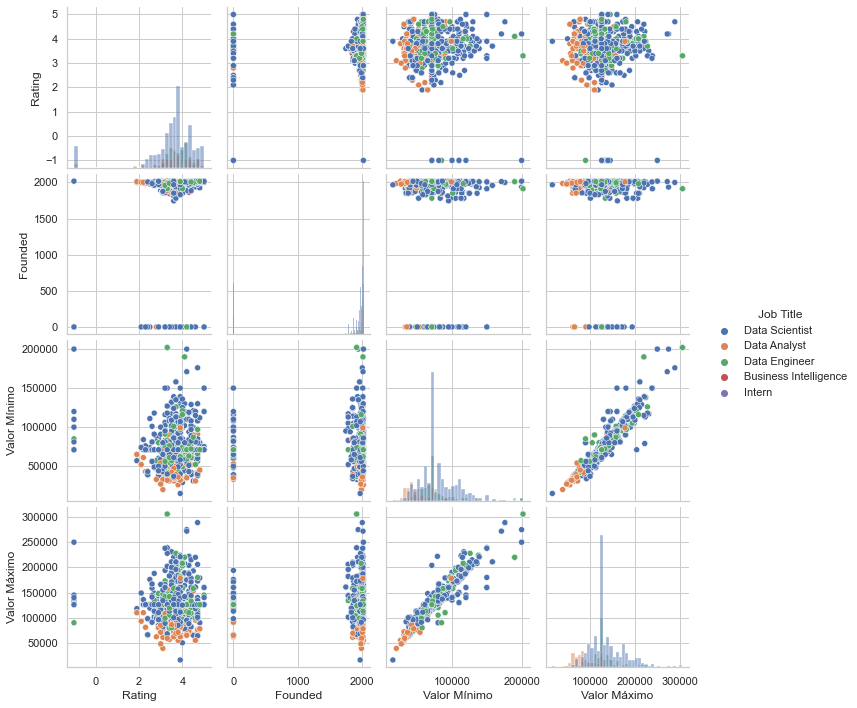

In [44]:
# Criando gráfico
sns.pairplot(df, hue='Job Title', diag_kind="hist")

**Observações:**

Só conseguimos identificar uma evidente correlação positiva entre as colunas de **Valor Máximo** e **Valor Mínimo**.

Identificamos que existe uma correlação positiva entre as colunas de salários mínimos e máximos.
Contudo, númericamente quanto uma variável explica a outra? Para isso vamos criar uma matriz de correlação.

Text(0.5, 1.0, 'Correlação das Variáveis')

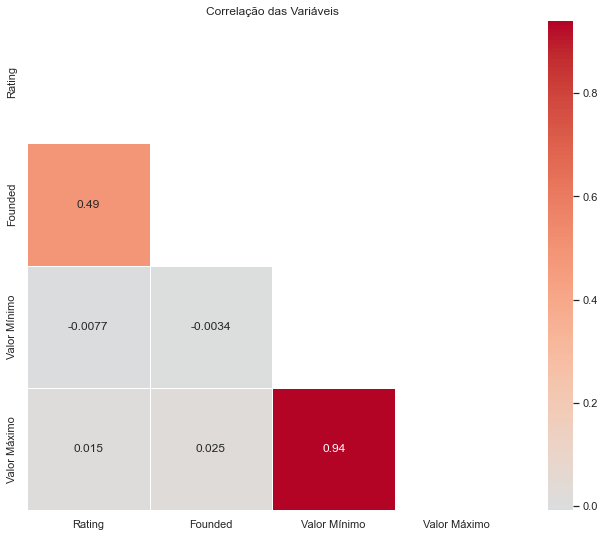

In [45]:
# Matriz
correlacao = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlacao, mask=mask, cmap='coolwarm', annot=True, center=0, linewidths=.5)
plt.title("Correlação das Variáveis")

**Observações:**

Com um valor de correlação de 0,94 conseguimos confirmar a correlação positiva entre Valor Máximo e Valor Mínimo. Isso mostra que quase todos os Valores que analisarmos de uma variável conseguimos explicar a outra.



---



---



## 06. Modelagem:

**Modelagem:** Agora que nossos dados estão prontos, vamos verificar o desempenho em dois algoritmos de regressão. Primeiro, vamos separar em dados de treino e teste. Segundo, criamos o modelo e análisamos e rodamos. Por último, os modelos precisam ser avaliados com base em um determinado conjunto de métricas de avaliação que precisam ser definidas. Para algoritmos de regressão, algumas das métricas comuns são - MSE e R Square.
<br/>

Os dados em mãos podem ser divididos de antemão como conjunto de treinamento e conjunto de validação. Esta divisão possui várias técnicas mas nesse projeto vamos usar a técnica de Train Test Split. 
<br/>

Os modelos precisam ser avaliados com base em um determinado conjunto de métricas de avaliação que precisam ser definidas. Para algoritmos de regressão, algumas das métricas comuns são - MSE e R Square.

Primeiro vamos identificar as colunas que usaremos e dividir entre categoricas e numericas.
<br/>

**categoricas:** 

- Job Title
- Size
- Revenue
- Pais
<br/>

**numerica:** 

- Rating
- Founded
- Valor Mínimo
- Valor Máximo

In [46]:
# Tratando colunas categóricas
cat_cols = ['Job Title', 'Size', 'Revenue', 'Pais_HQ']
treino_cat = df[cat_cols]

In [47]:
# Usando one hot encoding
treino_cat = pd.get_dummies(treino_cat)

In [48]:
# Tratando colunas numericas
num_cols = ['Rating', 'Founded', 'Valor Mínimo', 'Valor Máximo']
treino_num = df[num_cols]

Agora que identificamos as colunas que usaremos no nosso modelo, vamos concatenar e criar um dataframe.

In [49]:
# Criando o dataframe que iremos usar no modelo
treino = pd.concat([treino_cat, treino_num], axis=1)

In [50]:
# Visualisando as primeiras 5 linhas do dataset
treino.head()

,Job Title_Business Intelligence,Job Title_Data Analyst,Job Title_Data Engineer,Job Title_Data Scientist,Job Title_Intern,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,...,Pais_HQ_ South Korea,Pais_HQ_ Spain,Pais_HQ_ Switzerland,Pais_HQ_ United Kingdom,Pais_HQ_USA,Pais_HQ_Unknown,Rating,Founded,Valor Mínimo,Valor Máximo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,3.8,1973,53000.0,91000.0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,3.4,1984,63000.0,112000.0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,4.8,2010,80000.0,90000.0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,3.8,1965,56000.0,97000.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,2.9,1998,86000.0,143000.0


In [51]:
# Visualizando o número de linhas e colunas
nlinhas, nColunas = treino.shape
print(f'Este Dataset possui {nlinhas} linhas e {nColunas} colunas')

Este Dataset possui 932 linhas e 44 colunas


Chegou o momento de dividir os dados de treino e teste.

In [52]:
# Dividindo os dados de treino e teste (X e y) Variável alvo = Valor Máximo.

X = treino.drop('Valor Máximo', axis=1)
y = treino['Valor Máximo']

from sklearn.model_selection import train_test_split

# Vamos estratificar nossas amostras para que nosso teste tenha a mesma proporção de classes que nosso treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Após a divisão, vamos criar o nosso modelo. 

Vamos treinar 2 diferentes modelos de regressão e identificar qual tem a melhor precisão preditiva.

- **ExtraTreesRegressor**: Esta classe implementa um metaestimador que ajusta uma série de árvores de decisão aleatórias (também conhecidas como árvores extras) em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e o over-fitting.
<br/>

- **LinearRegression**: LinearRegression ajusta um modelo linear com coeficientes w = (w1, ..., wp) para minimizar a soma residual dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear.

In [53]:
# Importar o modelo
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Cria o modelo e treina o modelo
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train) 

# Olhando outra métrica
reg_y_pred = reg.predict(X_test)

In [54]:
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
mse = mean_squared_error(reg_y_pred, y_test)

In [55]:
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)
print('mse:', mse)

R2 no set de treino: 1.00
R2 no set de teste: 0.91
mse: 124913108.44062953


In [56]:
# Importar o modelo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo
regr = LinearRegression() 

# Treina o modelo
regr.fit(X_train, y_train) 

# Olhando outra métrica
regr_y_pred = regr.predict(X_test)

In [57]:
r2_train = regr.score(X_train, y_train)
r2_test = regr.score(X_test, y_test)
mse = mean_squared_error(regr_y_pred, y_test)

In [58]:
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)
print('mse:', mse)

R2 no set de treino: 0.91
R2 no set de teste: 0.87
mse: 174793611.4340817


Como a classe **ExtraTreesRegressor** performou melhor que a **LinearRegression**. Vamos utilizar ela para prever o **Valor Mínimo**
<br/>

**ExtraTreesRegressor**
<br/>

R2 no set de treino: 1.00
<br/>
R2 no set de teste: 0.91
<br/>
mse: 124913108.44062953

**LinearRegression**
<br/>

R2 no set de treino: 0.91
<br/>
R2 no set de teste: 0.87
<br/>
mse: 174793611.4341191

In [59]:
# Dividindo os dados de treino e teste (X e y) Variável alvo = Valor Máximo.

X = treino.drop('Valor Mínimo', axis=1)
y = treino['Valor Mínimo']

from sklearn.model_selection import train_test_split

# Vamos estratificar nossas amostras para que nosso teste tenha a mesma proporção de classes que nosso treino
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [60]:
# Importa o modelo
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Criar e treinar o modelo
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train) 

# Olhando outra métrica
reg_y_pred = reg.predict(X_test)

In [61]:
r2_train = reg.score(X_train, y_train)
r2_test = reg.score(X_test, y_test)
mse = mean_squared_error(reg_y_pred, y_test)

In [62]:
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)
print('mse:', mse)

R2 no set de treino: 1.00
R2 no set de teste: 0.92
mse: 49245083.88173581




---



---



## 07. Conclusão:

Podemos concluir que existe uma correlação positiva expressiva entre o Valor Máximo pago pelas empresas e o Valor Mínimo mas, não identificamos uma correlação entre as características das empresas analisadas com os valores salariais.  Apoiado nessa conclusão, criamos a hipótese de que os valores salariais ofertados pelas empresas são correlacionados com as habilidades dos candidatos. Habilidades essas operacionais e ou comportamentais. 

Também acredito que a amostra analisada possuia poucos valores de determinados cargos, o que pode ter influênciado algumas análises.

Para uma análise mais profunda é necessário pesquisar banco de dados mais completos que contenham as informações exigidas para a candidatura dos profissionais e não apenas as características das empresas contratantes. 








---



---

